In [1]:
'''
Import the helper functions: map_tuple, mean
'''
%run ./lib/helper.py
%run ./lib/graph.py
%run ./lib/graph_edge_factory.py
%run ./lib/plot.py
%run ./lib/routing_simulation.py
%run ./lib/routing_algorithms.py
%run ./lib/logger.py
%run ./lib/parse_from_log.py

# Run initial knowledge for k=4 power law

In [2]:
samples = 1000
max_th = 4
start = time.time()index
for rounds in range(2):
    initial_knowledge_results = []
    for dth in range(1, max_th + 1):
        threshold = 2 ** dth
        factory = graph_edge_factory.GraphEdgesFactory(distance_threshold=threshold, max_threshold=2 ** max_th)
        graph_edges = factory.generate_random_power_law_graph_edges(number_of_links=4)
        arguments = {'algorithm': routing_algorithms.initial_knowledge_init, 'graph_edges': graph_edges,
                     'link_prediction': False, 'exponential_scale': True}
        local_result, length = routing_simulation.run_algorithm_for_graphs(60, samples, arguments)
        initial_knowledge_results.append(local_result)
    end = time.time()
    write_results_to_file(initial_knowledge_results, 'initial_knowledge_power_k4_proc1_round_' + str(rounds) + '_dth_' + str(threshold), '' , (end - start))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/antal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-f86c504cffc3>", line 5, in <module>
    plot_results(initial_knowledge_results[2], 'poly', topology_names=['dth=2','dth=4','dth=8','dth=16'], save_tikz=False)
  File "/home/antal/Documents/eit/thesis/implementation/quantum_routing/notebooks/lib/plot.py", line 59, in plot_results
    plot_type=plot_type, save_tikz=save_tikz)
  File "/home/antal/Documents/eit/thesis/implementation/quantum_routing/notebooks/lib/plot.py", line 20, in plot_specific_measure
    plt.plot(index+1, results[index][measure_index], color=colors[index], label=topology_names[index])
  File "/home/antal/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py", line 2811, in plot
    is not None else {}), **kwargs)
  File "/home/antal/anaconda3/lib/python3.7/site-packages/matplotlib/__init

ValueError: x and y must have same first dimension, but have shapes (1,) and (60,)

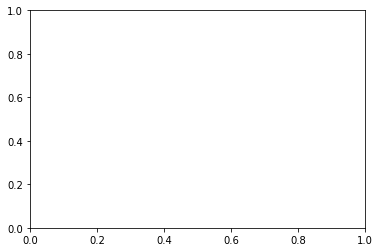

In [2]:
path = '/home/antal/Documents/eit/thesis/implementation/quantum_routing/notebooks/logs'
filename = 'initial_knowledge_power_k4_proc1_round_0_dth_16_1000__19_06_26__15_18.log'
initial_knowledge_results = parse_from_log(path,filename)
#print(initial_knowledge_results)
plot_results(initial_knowledge_results[2], 'poly', topology_names=['dth=2','dth=4','dth=8','dth=16'], save_tikz=False)

# Maxdth=8ra kivesz ket 8as link es berak ket 16os link

In [5]:
factory = graph_edge_factory.GraphEdgesFactory(distance_threshold=8, max_threshold=8)
graph_edges = factory.generate_deterministic_graph_edges(factory.deterministic_link)
graph_edges.remove((1, 9, 1))
graph_edges.remove((25, 1, 1))
graph_edges += [(1, 17, 2)]
eight_modified_results = []
arguments = {'algorithm': routing_algorithms.initial_knowledge_init, 'graph_edges': graph_edges,
                 'link_prediction': False, 'exponential_scale': True}
local_result, length = routing_simulation.run_algorithm_for_graphs(50, samples, arguments)
eight_modified_results.append(local_result)

In [15]:
print(initial_knowledge_results[3])

([2.777, 13621735.967, 38076099.071333304, 68100056.78125, 85070184.9848001, 99275134.44999999, 103971567.17771433, 102025932.344, 118801349.47655556, 127534843.02170002, 141328088.33736354, 144288144.43950012, 155786500.83430767, 149726220.7403571, 156634409.3067334, 153449901.1045625, 158043731.49076447, 166851375.49649996, 154000490.81184208, 168918487.8178499, 180463526.29414314, 186014737.85995442, 182111016.9670435, 179723675.22362506, 186480339.67524007, 177773070.9274617, 190145470.3636665, 186549284.504, 189052448.34968987, 191115645.7086998, 190750392.36212933, 200395440.37471876, 195415987.73115146, 191636238.76376474, 200062463.56242868, 199786517.9345001, 200174598.69948635, 195902651.38426346, 201603341.6520513, 199878768.79974985, 200610577.62936607, 202610862.84988073, 208826181.13832572, 200328351.98706824, 209564287.16184434, 200669717.81617364, 209574753.35719165, 194101409.02464572, 209416198.9944492, 205430678.5108398], [57.223, 55.9165, 54.72633333333334, 53.5325,

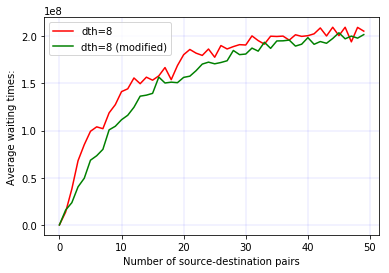

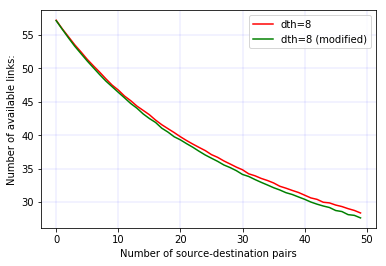

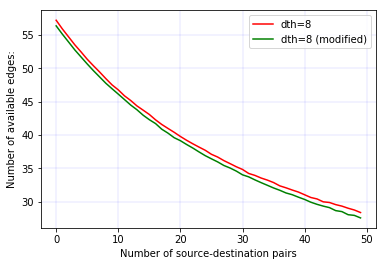

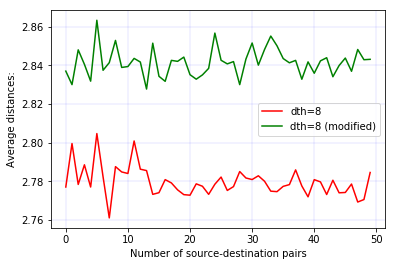

In [20]:
plot_results([initial_knowledge_results[3]]+eight_modified_results, 'poly', topology_names=['dth=8','dth=8 (modified)'], save_tikz=False)

In [4]:
write_results_to_file(initial_knowledge_results, 'initial_knowledge_maxdth_' + str(8), '' , (end - start))